# Volume notebook

This notebook is to explore the amounts volume of loan, deposits and successul vends.

Import libraries

In [84]:
import pandas as pd
from matplotlib import pyplot as plt
from fbprophet import Prophet
from datetime import datetime
from sklearn import preprocessing
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

Read the csv files into dataframes. CSV files include deposits,loans taken and all successful purchases of token between January and March 2019.
The features include:
* ***address***: the mobile number of account
* ***amount/transamount***: the total paid or borrowed for loan purchase
* ***unit***: the unit of the token
* ***transactionid*** : unique identifier for each transaction
* ***time/systranstime***: the timestamp of the transaction
* ***billrefnumber***:unique identifier for account

***successfulVends_raw*** holds data for successful purchases

***deposit_raw*** holds data for deposits

***loan_raw*** holds data for borrowed amounts to purchase tokens


They have been named raw because they contain unrequired features for building the model

In [85]:
successfulVends_raw = pd.read_csv("successfulVENDS2019.csv")
deposit_raw = pd.read_csv("deposit2019.csv")
loan_raw = pd.read_csv("loan2019.csv")

Selecting required features

In [86]:

deposit = deposit_raw[["systemtranstime","transamount"]]
successfulVends = successfulVends_raw[["time","amount"]]
loan = loan_raw[["time","amount"]]

In [87]:
#z = successfulVends[['amount','unit']]
def normalize(z):
    x = z
    x = x.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(np.vstack(x))
    return x_scaled


## Deposit 

Renaming the deposit features to amount and time

In [88]:
deposit= deposit.rename(index=str,columns={"transamount":"amount","systemtranstime":"time"})

Converting time column to datetime type for easier manipulation

In [89]:
deposit['time']=pd.to_datetime(deposit.time)
successfulVends['time']=pd.to_datetime(successfulVends.time)
loan['time']=pd.to_datetime(loan.time)

In [90]:
def month(df1,df2,df3):

    for i in range(1,4):
        fig,axes = plt.subplots(nrows=1,ncols=3)
        df1[df1.index.month==i].plot(ax=axes[0],title="Deposit Amounts")
        df2[df2.index.month==i].plot(ax=axes[1],title="Successul Vends Amounts")
        df3[df3.index.month==i].plot(ax=axes[2],title="Loan Amounts")
        

Resampled by minute 

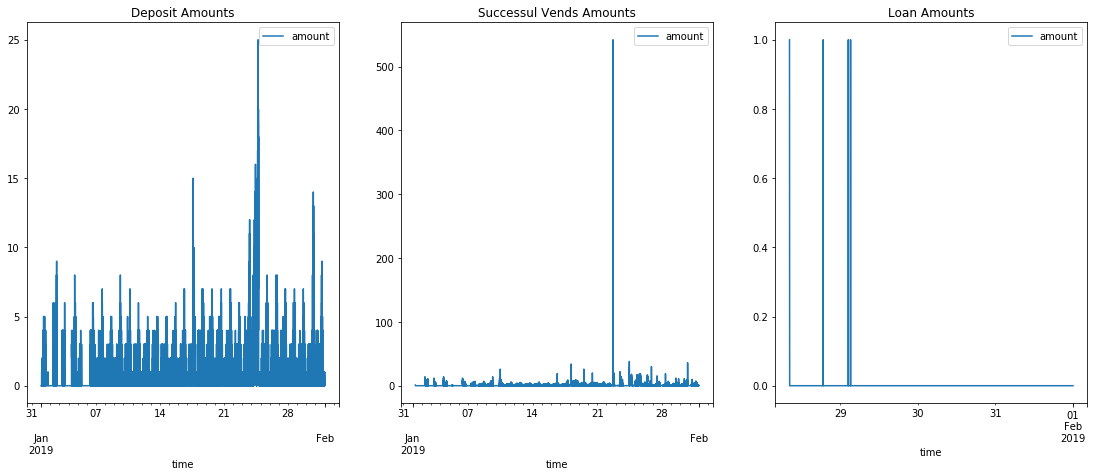

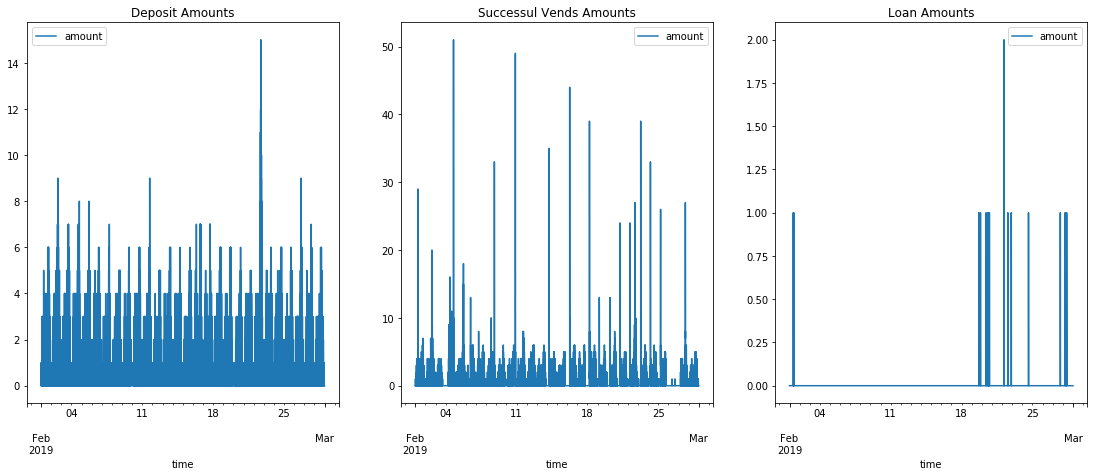

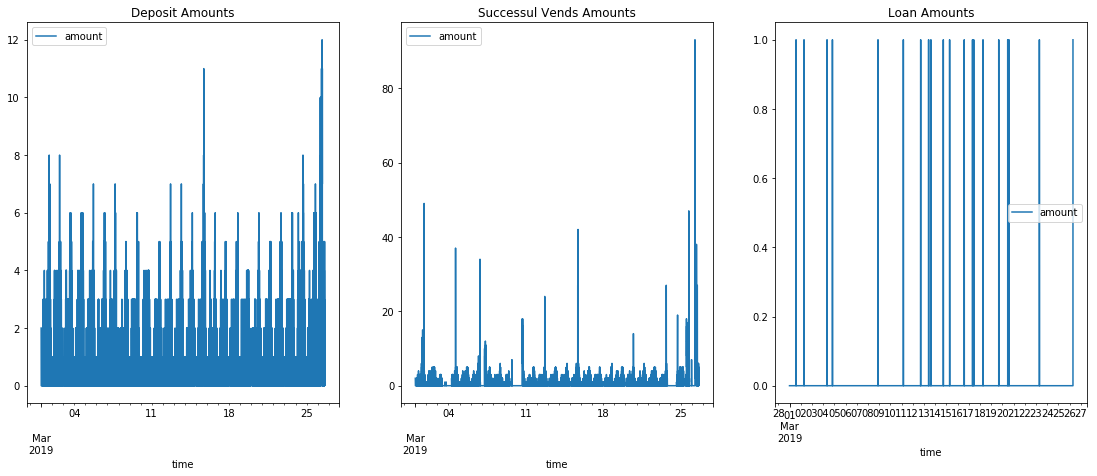

In [91]:
plt.rcParams['figure.figsize']=[19,7]

deposit_min = deposit.resample('1min', on='time').count().drop('time',axis=1)

successfulVends_min = successfulVends.resample('1min', on='time').count().drop('time',axis=1)


loan_min = loan.resample('1min', on='time').count().drop('time',axis=1)


month(deposit_min,successfulVends_min,loan_min)


Resampled by hour

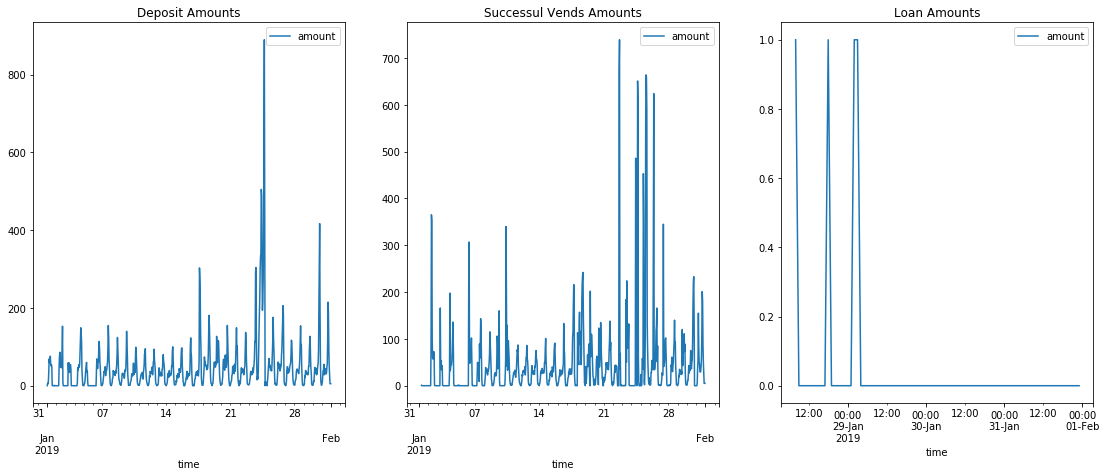

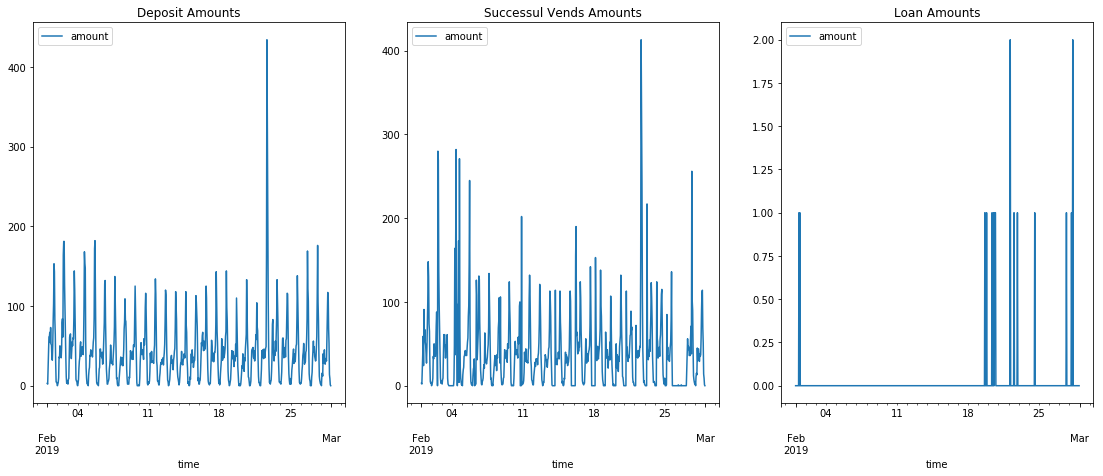

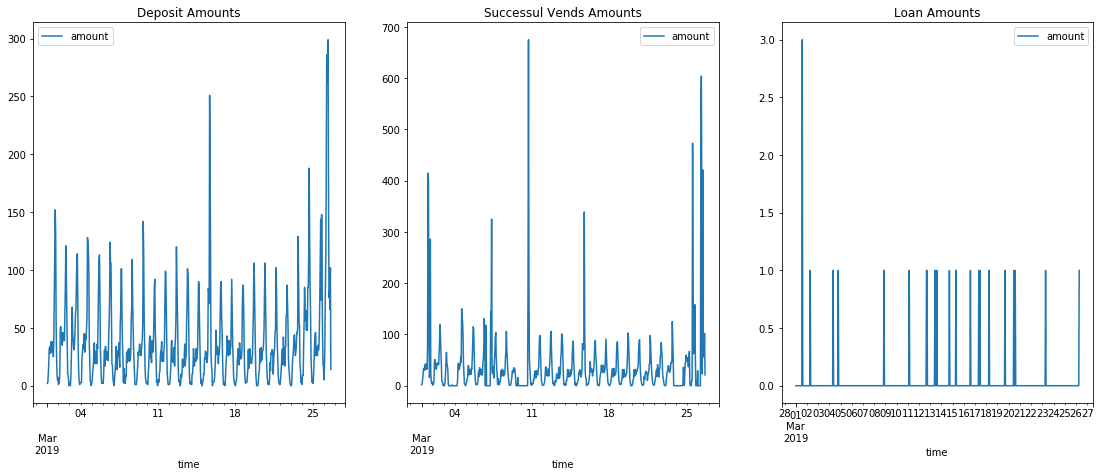

In [92]:
deposit_hour = deposit.resample('60min', on='time').count().drop('time',axis=1)

successfulVends_hour = successfulVends.resample('60min', on='time').count().drop('time',axis=1)

loan_hour = loan.resample('60min', on='time').count().drop('time',axis=1)


month(deposit_hour,successfulVends_hour,loan_hour)

Resampled by day

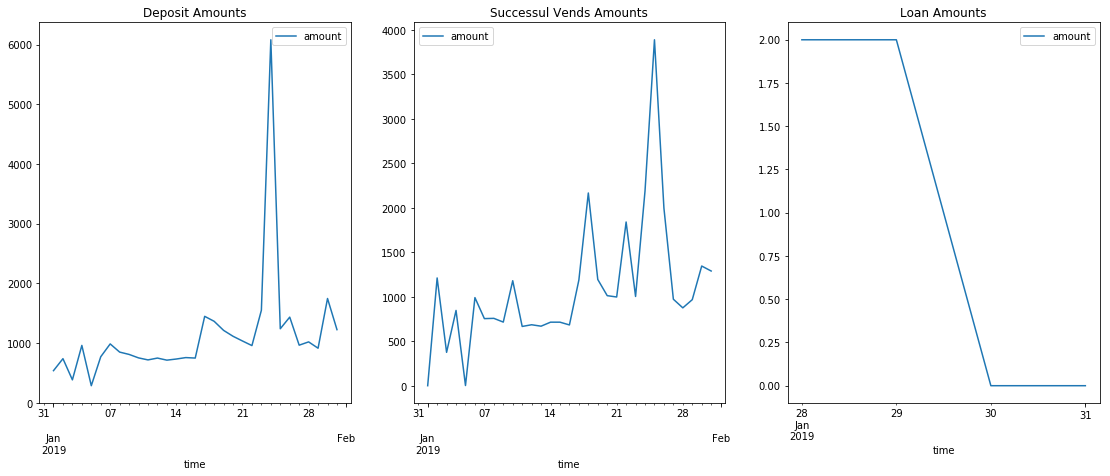

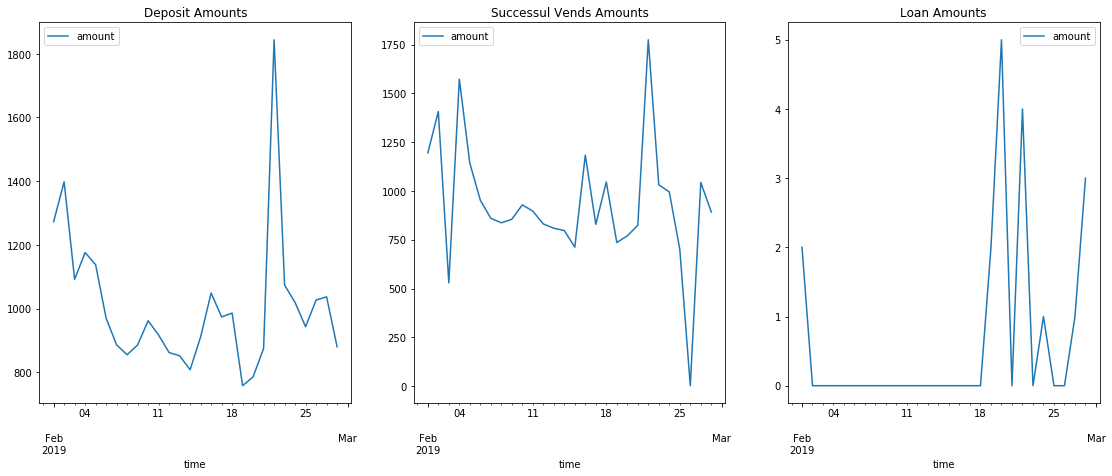

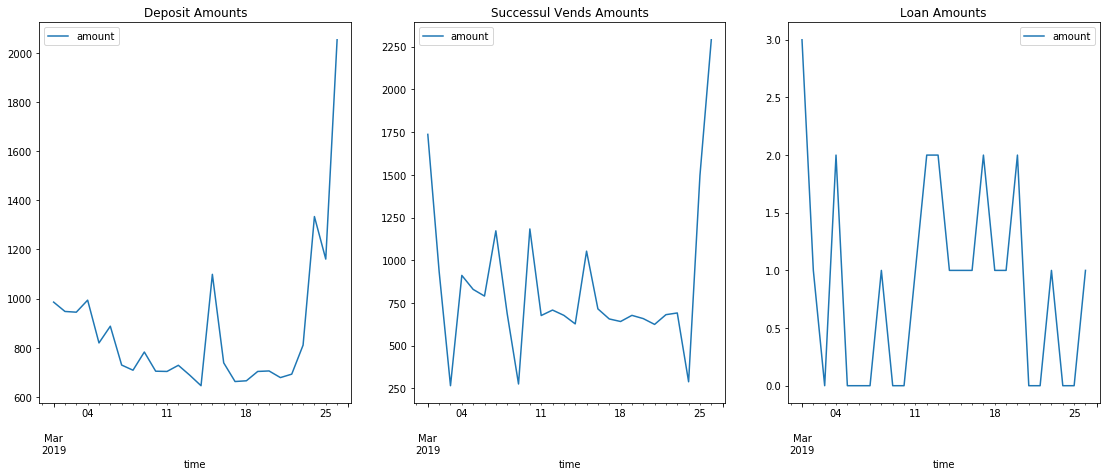

In [93]:
deposit_day = deposit.resample('1d', on='time').count().drop('time',axis=1)

successfulVends_day = successfulVends.resample('1d', on='time').count().drop('time',axis=1)

loan_day = loan.resample('1d', on='time').count().drop('time',axis=1)


month(deposit_day,successfulVends_day,loan_day)

Resampled by 3H

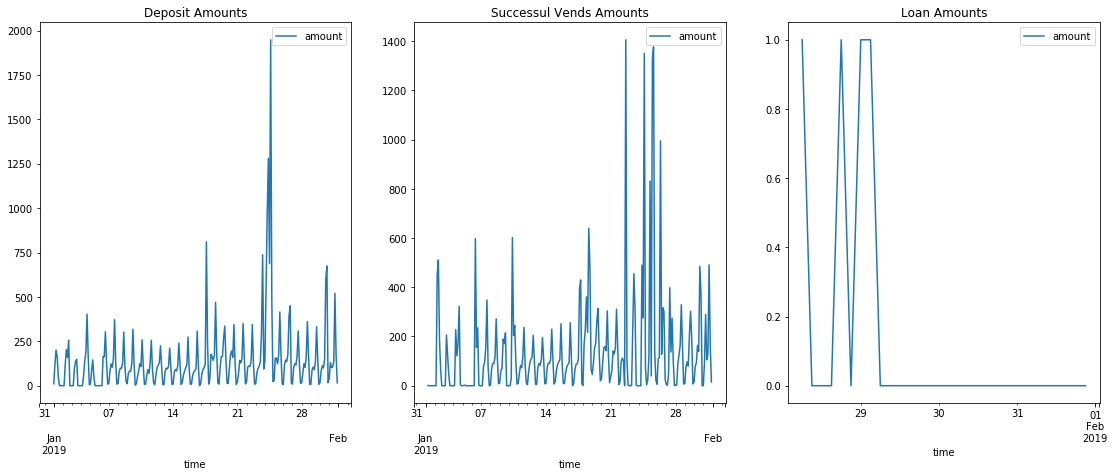

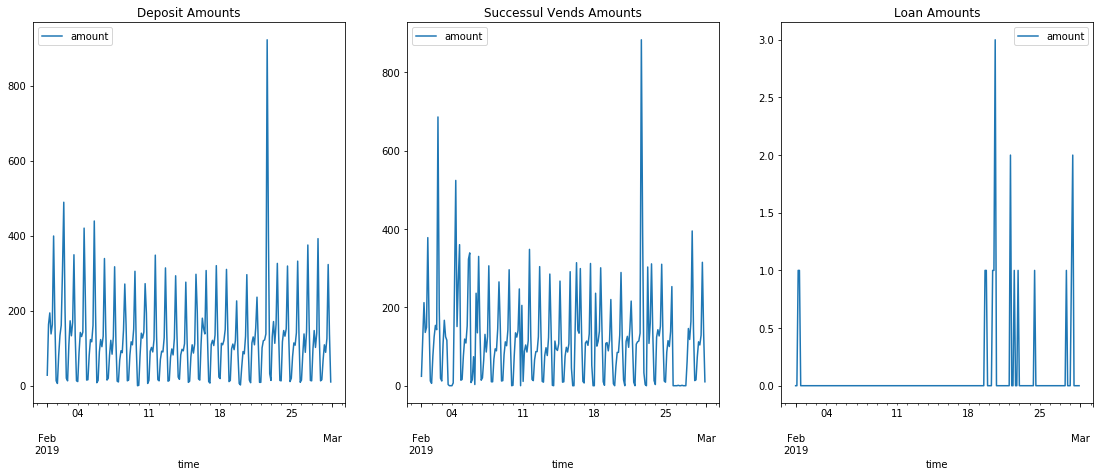

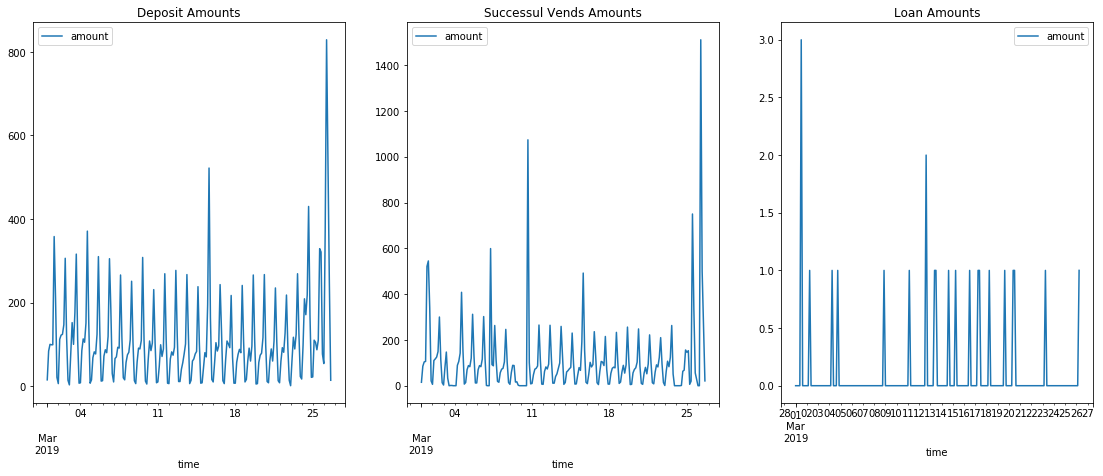

In [94]:
deposit_3H = deposit.resample('3H', on='time').count().drop('time',axis=1)

successfulVends_3H = successfulVends.resample('3H', on='time').count().drop('time',axis=1)

loan_3H = loan.resample('3H', on='time').count().drop('time',axis=1)


month(deposit_3H,successfulVends_3H,loan_3H)

Get the average amount by hour

In [95]:
deposit['hour'] = deposit.time.dt.hour
successfulVends['hour'] = successfulVends.time.dt.hour
loan['hour'] = loan.time.dt.hour

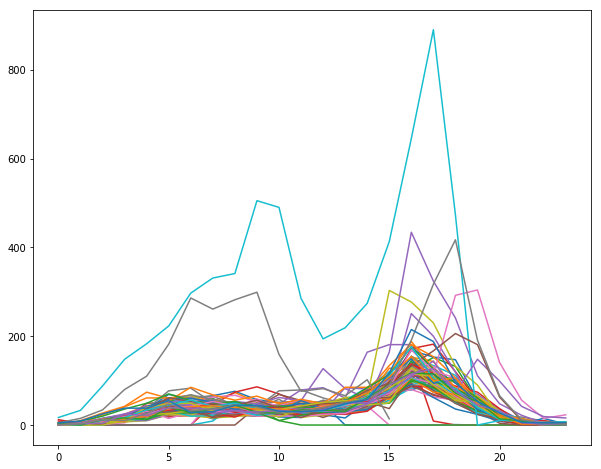

In [96]:
plt.figure(figsize=(10, 8))
for i in range(1,32):
    for j in range(1,4):
        temp = deposit_hour[deposit_hour.index.day==i]
        
        plt.plot(temp[temp.index.month==j].index.hour,temp[temp.index.month==j].amount)
#plt.ylim(0,40000) 

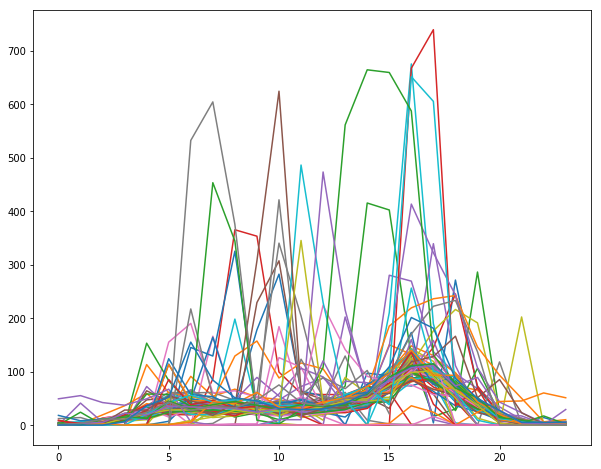

In [97]:
plt.figure(figsize=(10, 8))
for i in range(1,32):
    for j in range(1,4):
        temp = successfulVends_hour[successfulVends_hour.index.day==i]
        
        plt.plot(temp[temp.index.month==j].index.hour,temp[temp.index.month==j].amount)
#plt.ylim(0,100000) 

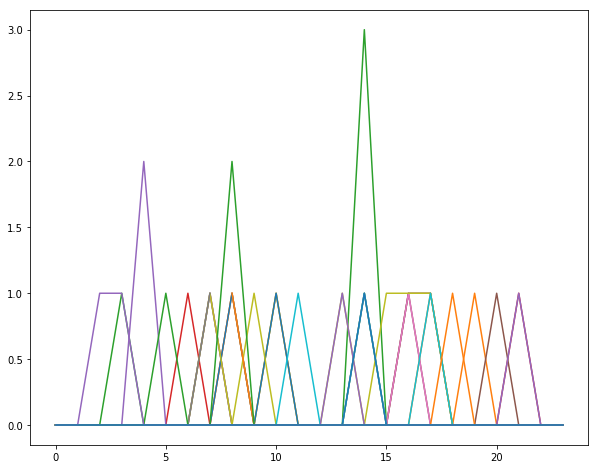

In [98]:
plt.figure(figsize=(10, 8))
for i in range(1,32):
    for j in range(1,4):
        temp = loan_hour[loan_hour.index.day==i]
        
        plt.plot(temp[temp.index.month==j].index.hour,temp[temp.index.month==j].amount)
#plt.ylim(0,40000) 

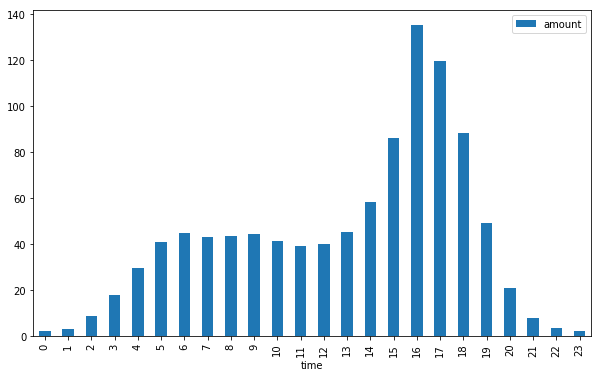

In [99]:
plt.rcParams['figure.figsize']=[10,6]
deposit_hour.groupby([deposit_hour.index.hour]).mean().plot.bar()

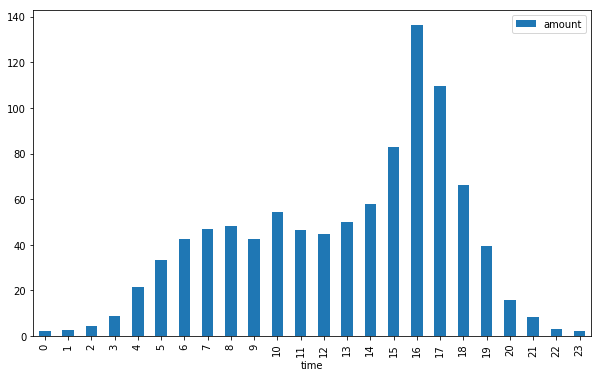

In [100]:
plt.rcParams['figure.figsize']=[10,6]
successfulVends_hour.groupby([successfulVends_hour.index.hour]).mean().plot.bar()

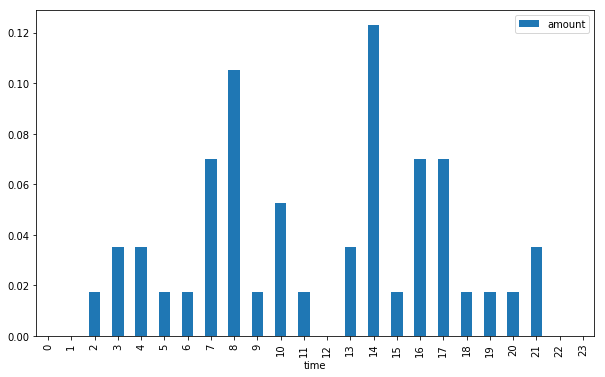

In [101]:
plt.rcParams['figure.figsize']=[10,6]
loan_hour.groupby([loan_hour.index.hour]).mean().plot.bar()

## Comparing Deposits, Loan and Successful Vends

In [105]:

df = pd.DataFrame([deposit_hour.amount,successfulVends_hour.amount,loan_hour.amount]).T.dropna()
df.columns=("deposit","successfulVends","loan")


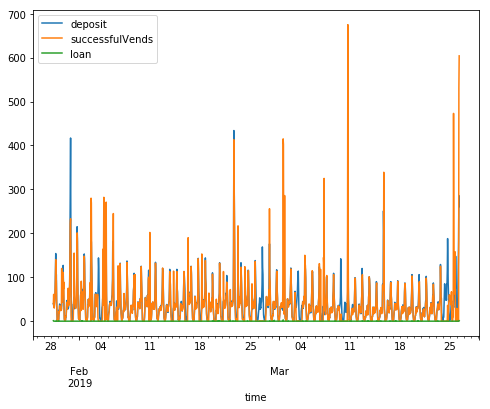

In [106]:
df.plot()


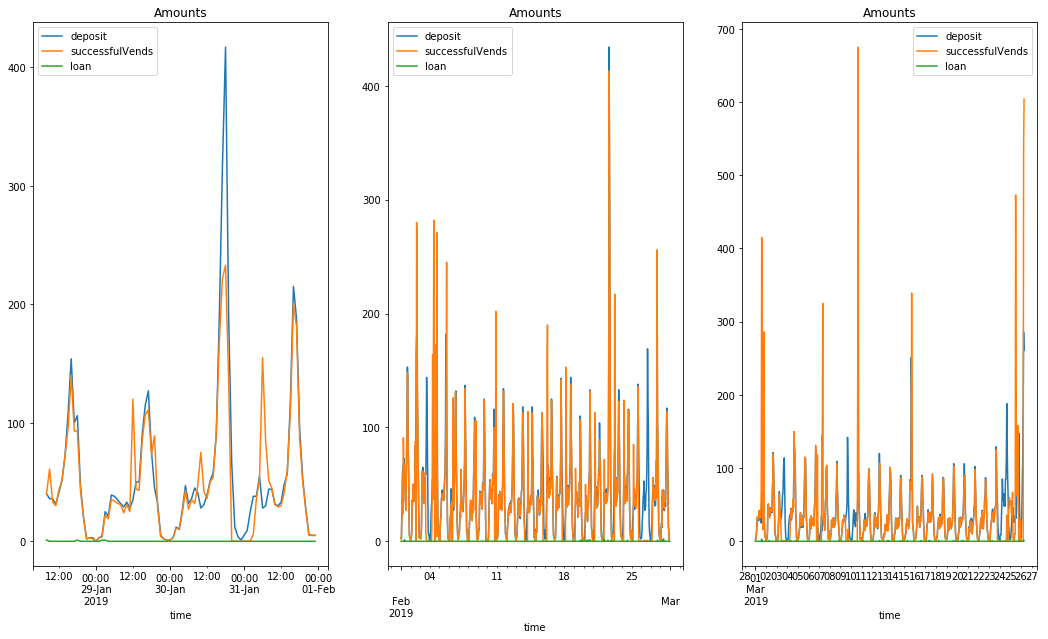

In [107]:
plt.rcParams['figure.figsize']=[18,10]
fig,axes = plt.subplots(nrows=1,ncols=3)
for i in range(1,4):
    
    df[df.index.month==i].plot(ax=axes[i-1],title="Amounts")
        

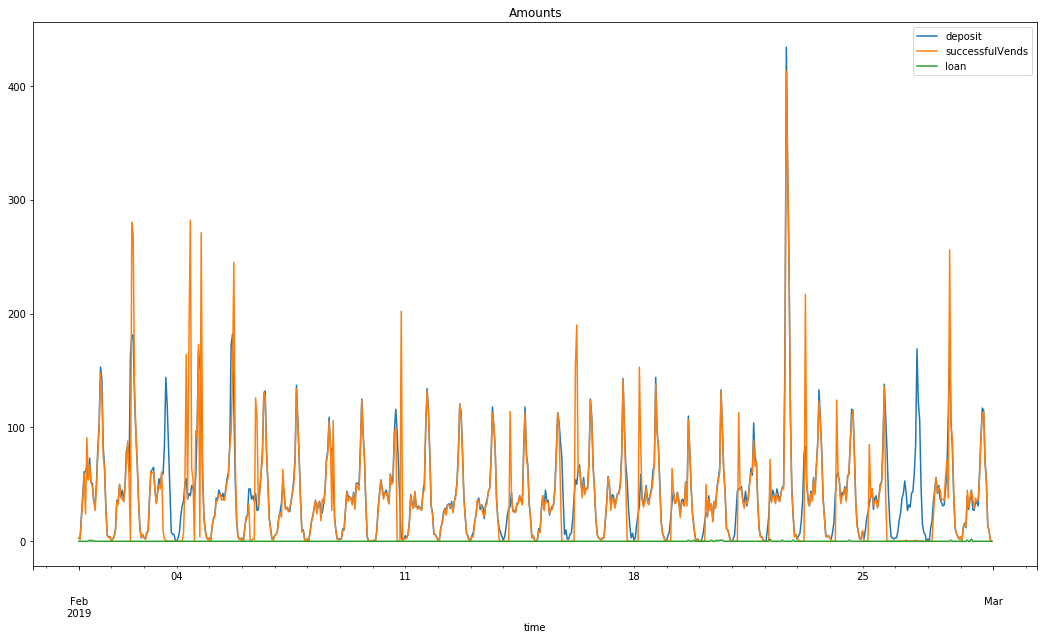

In [108]:
df[df.index.month==2].plot(title="Amounts")

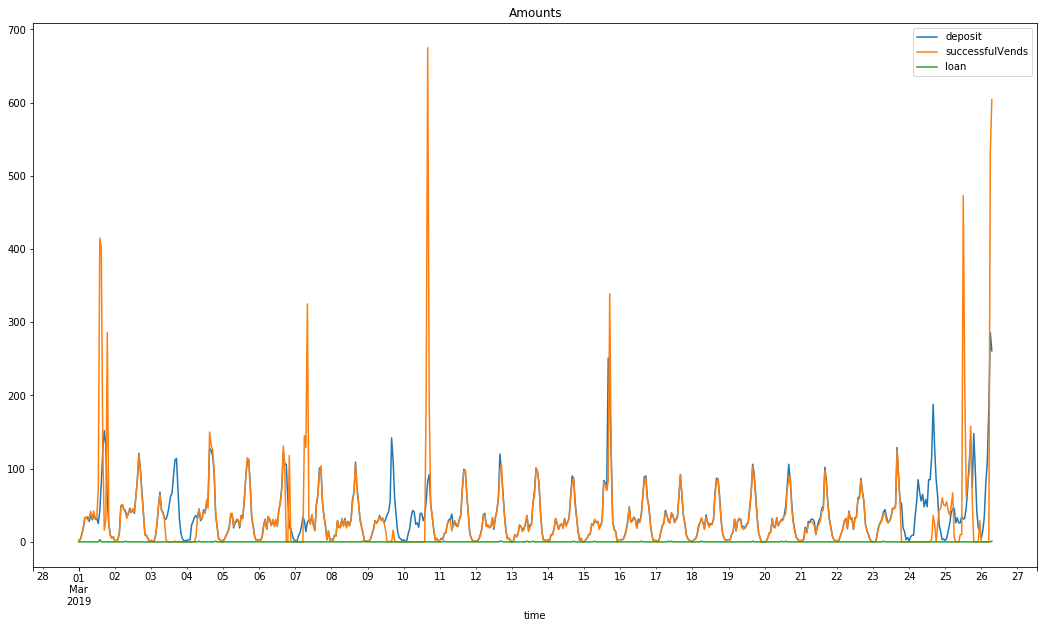

In [109]:
df[df.index.month==3].plot(title="Amounts")